In [33]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [34]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [54]:
# Import the requests library.
import requests
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress


In [36]:
# Import the API key.
from config import weather_api_key

In [37]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [38]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [39]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [40]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [41]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | karakendzha
City not found. Skipping...
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | port maria
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | peniche
Processing Record 8 of Set 1 | coolum beach
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | acapulco
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | yialos
City not found. Skipping...
Processing Record 14 of Set 1 | banepa
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | puerto madryn
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | zhanaozen
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 21 of Set 1 | samalaeulu
City not found. Ski

Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | punta cardon
Processing Record 44 of Set 4 | logstor
Processing Record 45 of Set 4 | paracuru
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | nguiu
City not found. Skipping...
Processing Record 48 of Set 4 | lagoa
Processing Record 49 of Set 4 | kurilsk
Processing Record 50 of Set 4 | itumbiara
Processing Record 1 of Set 5 | muros
Processing Record 2 of Set 5 | tsogni
Processing Record 3 of Set 5 | ayr
Processing Record 4 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 5 of Set 5 | plon
Processing Record 6 of Set 5 | saint-louis
Processing Record 7 of Set 5 | cuxhaven
Processing Record 8 of Set 5 | boshnyakovo
Processing Record 9 of Set 5 | kulhudhuffushi
Processing Record 10 of Set 5 | tiksi
Processing Record 11 of Set 5 | chokurdakh
Processing Record 12 of Set 5 | nyurba
Processing Record 13 of Set 5 | chuy
Processing Record 14 o

Processing Record 33 of Set 8 | mayo
Processing Record 34 of Set 8 | inhambane
Processing Record 35 of Set 8 | varkkallai
Processing Record 36 of Set 8 | pemba
Processing Record 37 of Set 8 | hasaki
Processing Record 38 of Set 8 | synya
Processing Record 39 of Set 8 | kandi
Processing Record 40 of Set 8 | hellebaek
Processing Record 41 of Set 8 | espanola
Processing Record 42 of Set 8 | kamaishi
Processing Record 43 of Set 8 | chapais
Processing Record 44 of Set 8 | grand gaube
Processing Record 45 of Set 8 | capoeiras
Processing Record 46 of Set 8 | ayorou
Processing Record 47 of Set 8 | yablonovo
Processing Record 48 of Set 8 | bay-khaak
Processing Record 49 of Set 8 | ban nahin
Processing Record 50 of Set 8 | barao de melgaco
Processing Record 1 of Set 9 | rawson
Processing Record 2 of Set 9 | pacific grove
Processing Record 3 of Set 9 | gualaquiza
Processing Record 4 of Set 9 | marcona
City not found. Skipping...
Processing Record 5 of Set 9 | mildura
Processing Record 6 of Set 9 |

Processing Record 19 of Set 12 | auki
Processing Record 20 of Set 12 | potoru
Processing Record 21 of Set 12 | sri aman
Processing Record 22 of Set 12 | gazli
Processing Record 23 of Set 12 | malpe
Processing Record 24 of Set 12 | assiniboia
Processing Record 25 of Set 12 | avera
Processing Record 26 of Set 12 | mana
Processing Record 27 of Set 12 | pacifica
Processing Record 28 of Set 12 | chirongui
Processing Record 29 of Set 12 | sao raimundo nonato
Processing Record 30 of Set 12 | rumoi
Processing Record 31 of Set 12 | upington
Processing Record 32 of Set 12 | bandar-e lengeh
Processing Record 33 of Set 12 | igurubi
Processing Record 34 of Set 12 | yar-sale
Processing Record 35 of Set 12 | taburi
City not found. Skipping...
Processing Record 36 of Set 12 | energeticheskiy
Processing Record 37 of Set 12 | la asuncion
Processing Record 38 of Set 12 | gainesville
Processing Record 39 of Set 12 | garowe
Processing Record 40 of Set 12 | inirida
Processing Record 41 of Set 12 | bouna
Pro

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,30.94,67,100,13.82,RU,2021-10-11 21:18:50
1,Port Maria,18.3685,-76.8895,85.96,79,32,6.20,JM,2021-10-11 21:18:50
2,Mataura,-46.1927,168.8643,43.48,89,99,8.43,NZ,2021-10-11 21:13:51
3,Punta Arenas,-53.1500,-70.9167,53.71,50,40,26.46,CL,2021-10-11 21:14:04
4,Peniche,39.3558,-9.3811,76.62,54,100,10.36,PT,2021-10-11 21:18:51
5,Coolum Beach,-26.5333,153.1000,67.10,98,100,6.87,AU,2021-10-11 21:18:51
6,Ushuaia,-54.8000,-68.3000,51.46,46,40,17.27,AR,2021-10-11 21:18:51
7,Acapulco,16.8634,-99.8901,85.82,20,1,4.61,MX,2021-10-11 21:17:33
8,Kodiak,57.7900,-152.4072,44.11,76,90,17.27,US,2021-10-11 21:18:52
9,Nikolskoye,59.7035,30.7861,42.87,70,41,9.04,RU,2021-10-11 21:18:52


In [43]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [61]:
city_data_df.head(15)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-10-11 21:18:50,73.5069,80.5464,30.94,67,100,13.82
1,Port Maria,JM,2021-10-11 21:18:50,18.3685,-76.8895,85.96,79,32,6.20
2,Mataura,NZ,2021-10-11 21:13:51,-46.1927,168.8643,43.48,89,99,8.43
3,Punta Arenas,CL,2021-10-11 21:14:04,-53.1500,-70.9167,53.71,50,40,26.46
4,Peniche,PT,2021-10-11 21:18:51,39.3558,-9.3811,76.62,54,100,10.36
5,Coolum Beach,AU,2021-10-11 21:18:51,-26.5333,153.1000,67.10,98,100,6.87
6,Ushuaia,AR,2021-10-11 21:18:51,-54.8000,-68.3000,51.46,46,40,17.27
7,Acapulco,MX,2021-10-11 21:17:33,16.8634,-99.8901,85.82,20,1,4.61
8,Kodiak,US,2021-10-11 21:18:52,57.7900,-152.4072,44.11,76,90,17.27
9,Nikolskoye,RU,2021-10-11 21:18:52,59.7035,30.7861,42.87,70,41,9.04


In [45]:
city_data_df.count()

City          588
Country       588
Date          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
dtype: int64

In [46]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [48]:
# Import the time module.
import time



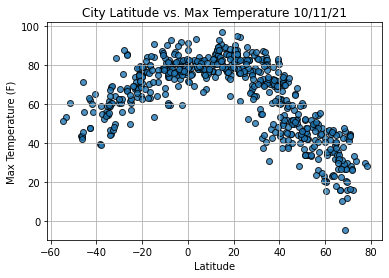

In [49]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

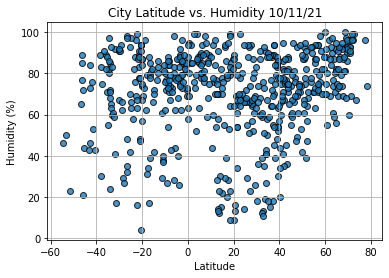

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

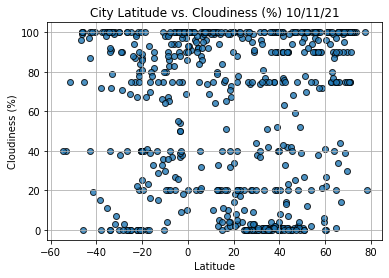

In [51]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

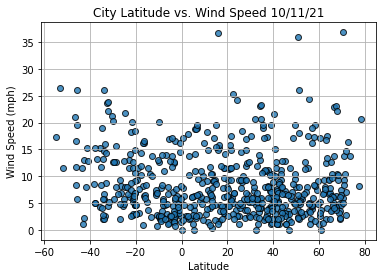

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [58]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [60]:
index13 = city_data_df.loc[13]
index13

City                  Tuktoyaktuk
Country                        CA
Date          2021-10-11 21:18:53
Lat                       69.4541
Lng                     -133.0374
Max Temp                     30.2
Humidity                       86
Cloudiness                     90
Wind Speed                   3.44
Name: 13, dtype: object

In [62]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-10-11 21:18:50,73.5069,80.5464,30.94,67,100,13.82
1,Port Maria,JM,2021-10-11 21:18:50,18.3685,-76.8895,85.96,79,32,6.20
4,Peniche,PT,2021-10-11 21:18:51,39.3558,-9.3811,76.62,54,100,10.36
7,Acapulco,MX,2021-10-11 21:17:33,16.8634,-99.8901,85.82,20,1,4.61
8,Kodiak,US,2021-10-11 21:18:52,57.7900,-152.4072,44.11,76,90,17.27


In [63]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

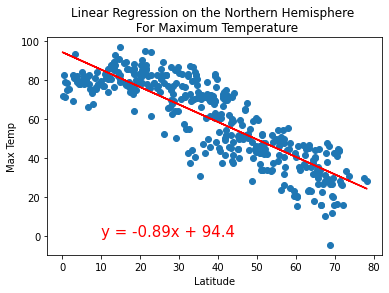

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n For Maximum Temperature', 'Max Temp',(10,0))

In [115]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)


LinregressResult(slope=0.20985657884985717, intercept=50.124767660789594, rvalue=0.10274630021278913, pvalue=0.04073980303164337, stderr=0.1022240967928108, intercept_stderr=4.31397388124373)

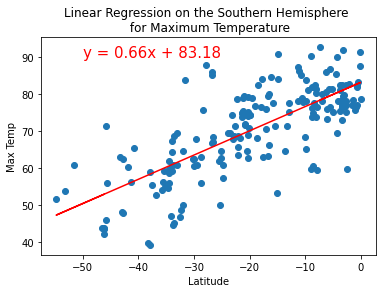

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

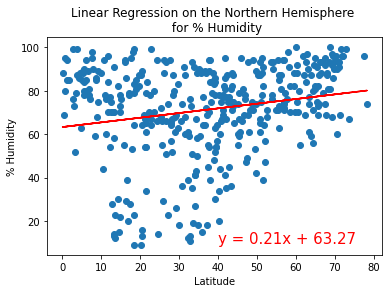

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

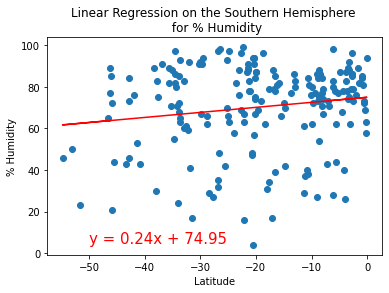

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,5))


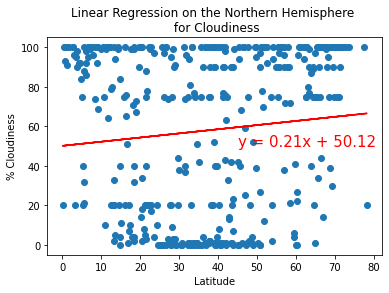

In [101]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Cloudiness', '% Cloudiness',(45,50))

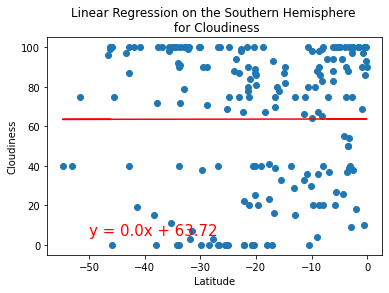

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Cloudiness', 'Cloudiness',(-50,5))

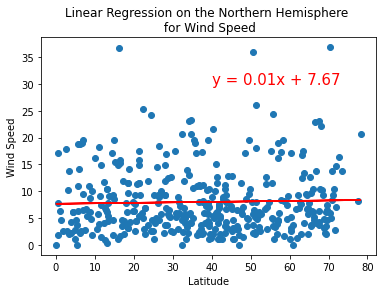

In [121]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

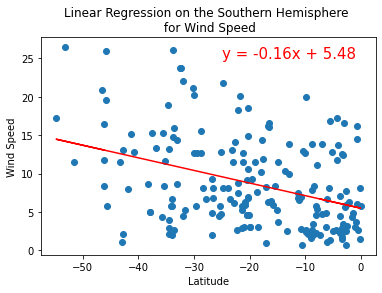

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))